# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [56]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [57]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,182,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,375,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,528,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,223,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,840,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,593,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,346,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,357,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


Methods `describe` and `info` deliver some useful information.

In [58]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,425.723133,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,242.288797,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,0.000000,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,217.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,430.000000,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,636.000000,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


In [59]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [114]:
### YOUR CODE HERE
import warnings
warnings.filterwarnings('ignore')
# As we can see (from X_train_pd.describe()) our features have noticable differences between their ranges
# These differences in the ranges can cause trouble in many use cases. 
# E.g. for the models that are based on distance computation, if one of the features has a broad range of values,
# the distance will be governed by this particular feature. If a feature has a variance that in orders of 
# magnitude larger than others, it might dominate the objective function and make the estimator 
# unable to learn from other features correctly as expected.
# Thus we need to standardize data first
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # Compute the mean and std to be used for later scaling. We compute it only on train data
# so there won't be any data leakage from the test data.
# Now let's standardize train and test data with computed scaling measures.
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [61]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

base_model = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=42)
# Logistic Regression requires two parameters 'C' and 'penalty' to be optimised by GridSearchCV.
parameters = dict(C = np.logspace(-4, 4, 50), penalty = ['l1', 'l2'])
model = GridSearchCV(base_model, param_grid=parameters, cv=5)
model.fit(X_train_scaled, y_train)
y_pred_proba = model.best_estimator_.predict_proba(X_test_scaled)
y_pred = model.best_estimator_.predict(X_test_scaled)

Weighted F1 Score 0.8188294078771624
Accuracy Score 0.8215488215488216


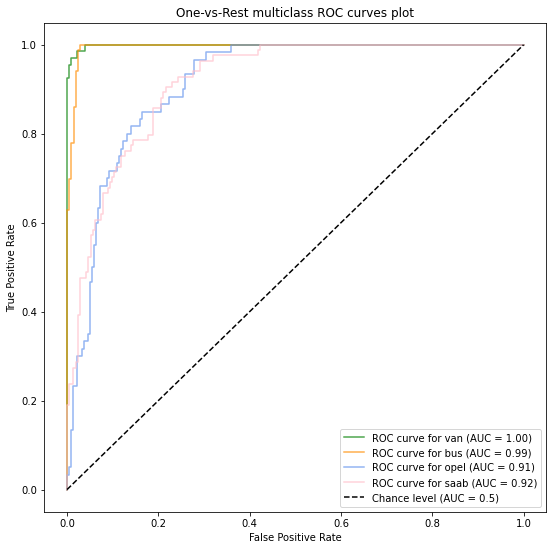

In [62]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

def show_f1_and_accuracy(y_test, y_pred):
    print(f'Weighted F1 Score {f1_score(y_test, y_pred, average="weighted")}')
    print(f'Accuracy Score {accuracy_score(y_test, y_pred)}')

def cars_roc(y_prd, y_train, y_test, target=target):
    # We defined that we need four colors via len(set(target))
    colors = ['green', 'darkorange', 'cornflowerblue', 'pink']
    label_binarizer = LabelBinarizer().fit(y_train)
    y_bin_test = label_binarizer.transform(y_test)
    _, ax = plt.subplots(figsize=(9, 9))
    for clazz, color in zip(set(target), colors):
        class_id = np.flatnonzero(label_binarizer.classes_ == clazz)[0]
        RocCurveDisplay.from_predictions(
            y_bin_test[:, class_id],
            y_prd[:, class_id],
            name=f'ROC curve for {clazz}',
            alpha=0.7,
            color=color,
            ax=ax,
            plot_chance_level=(class_id == 2),
        )

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('One-vs-Rest multiclass ROC curves plot')
    plt.legend()
    plt.show()

show_f1_and_accuracy(y_test, y_pred)
cars_roc(y_pred_proba, y_train, y_test)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

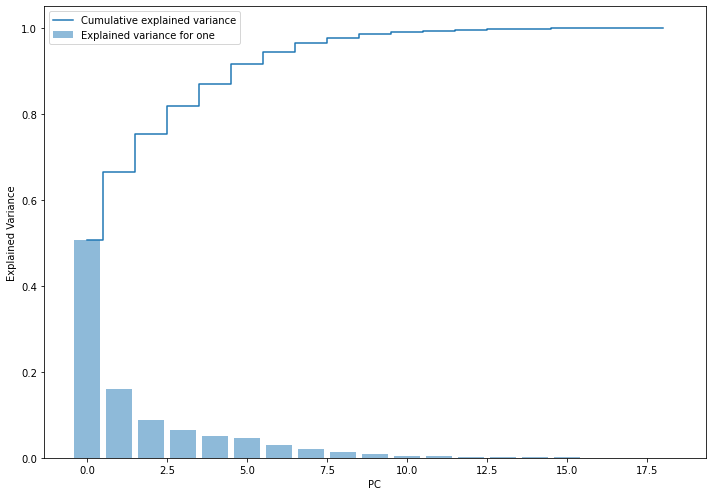

In [63]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10,7))
plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Explained variance for one')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained Variance')
plt.xlabel('PC')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

As 17 components is not very much yet covers 99% or variance I chose 17. The data should be normalized due to the PCA algorithm. It calculates a new projection of feaures based on existing ones and if we don't normalize the data features with larger scale impact more in result.

In [64]:
### YOUR CODE HERE
pca = PCA(n_components=17)
X_pca_train = pca.fit_transform(X_train_scaled)
X_pca_test = pca.fit_transform(X_test_scaled)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Weighted F1 Score 0.8220541434962642
Accuracy Score 0.8249158249158249


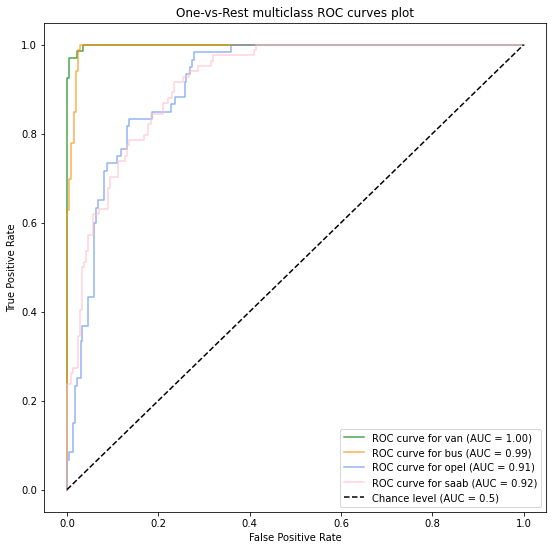

In [69]:
### YOUR CODE HERE
from sklearn.pipeline import Pipeline

parameters = dict(clf__C = np.logspace(-4, 4, 50), clf__penalty = ['l1', 'l2'])
pipe = Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=0.999, random_state=42)),
                ('clf', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, random_state=42))])

lr_gs = GridSearchCV(pipe, parameters, cv=5)
lr_gs.fit(X_train, y_train)
y_pred = lr_gs.predict(X_test)
y_pred_proba = lr_gs.predict_proba(X_test)
show_f1_and_accuracy(y_test, y_pred)
cars_roc(y_pred_proba, y_train, y_test)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Weighted F1 Score 0.6700176522789598
Accuracy Score 0.67003367003367


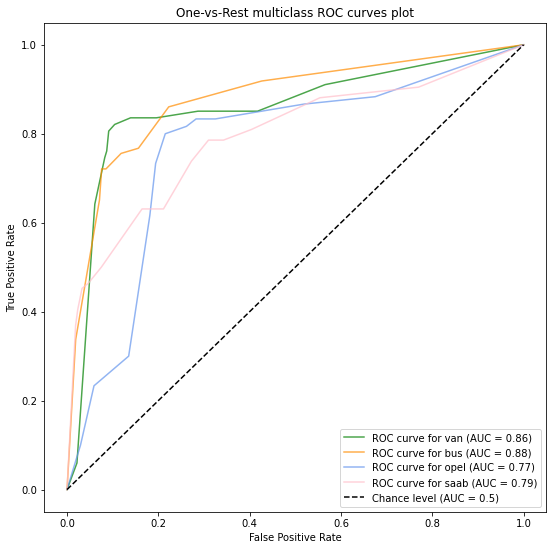

{'clf__max_depth': 6}

In [126]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
parameters = {'clf__max_depth': range(1, 19)}
pipe = Pipeline(steps=[('scaler', StandardScaler()), ('PCA', PCA(n_components=0.999, random_state=42)),
                ('clf', DecisionTreeClassifier(random_state=42))])

tree_gs = GridSearchCV(pipe, parameters, cv=5)
tree_gs.fit(X_train, y_train)
y_pred = tree_gs.predict(X_test)
y_pred_proba = tree_gs.predict_proba(X_test)
show_f1_and_accuracy(y_test, y_pred)
cars_roc(y_pred_proba, y_train, y_test)
tree_gs.best_params_

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [67]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

In [88]:
def bagging_4_estimator(estimator):
    result = []
    for i in range(2, 100, 5):
        ensemble = BaggingClassifier(estimator=estimator,
                                    n_estimators=i,
                                    max_samples=X_train.shape[0],
                                    bootstrap = True,
                                    random_state=17,
                                    n_jobs=-1)
        ensemble.fit(X_train, y_train)
        preds = ensemble.predict(X_test)  
        
        f1 = f1_score(y_test, preds, average='macro')
        accuracy = accuracy_score(y_test, preds)
        result.append({'ensemble_size': i, 'f1_score': f1, 'accuracy': accuracy})
    plt.figure(figsize=(9, 9))
    sizes = [item['ensemble_size'] for item in result]
    f1_scores = [item['f1_score'] for item in result]
    accs = [item['accuracy'] for item in result]
    plt.plot(sizes, f1_scores)
    plt.plot(sizes, accs)
    plt.grid()
    plt.xlabel('Bagging size')
    plt.legend(['F1 score', 'Accuracy'])
    plt.title(f'Bagging for {estimator}')
    plt.show()
    max_f1 = max(f1_scores)
    max_acc = max(accs)
    f_max_obj = f_max_objs[0] if (f_max_objs :=[x for x in result if x['f1_score']==max_f1]) else None
    acc_max_obj = acc_max_objs[0] if (acc_max_objs :=[x for x in result if x['accuracy']==max_acc]) else None
    print(f'Got best f1 score {max_f1:.2f} on size {f_max_obj["ensemble_size"]}')
    print(f'Got best accuracy {max_acc:.2f} on size {acc_max_obj["ensemble_size"]}')

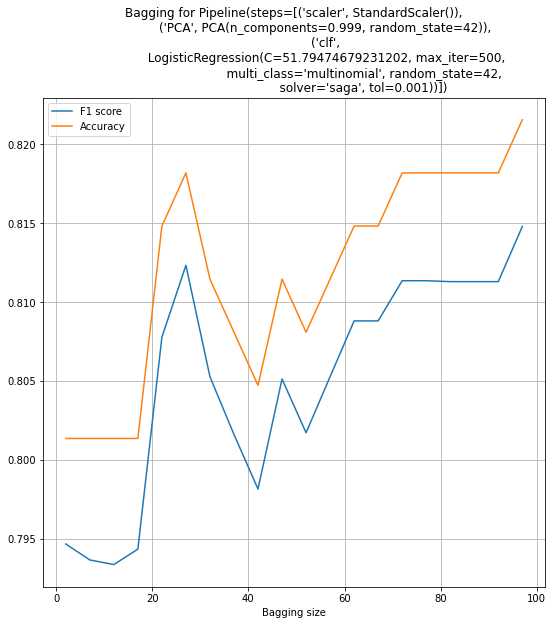

Got best f1 score 0.81 on size 97
Got best accuracy 0.82 on size 97


In [90]:
bagging_4_estimator(lr_gs.best_estimator_)

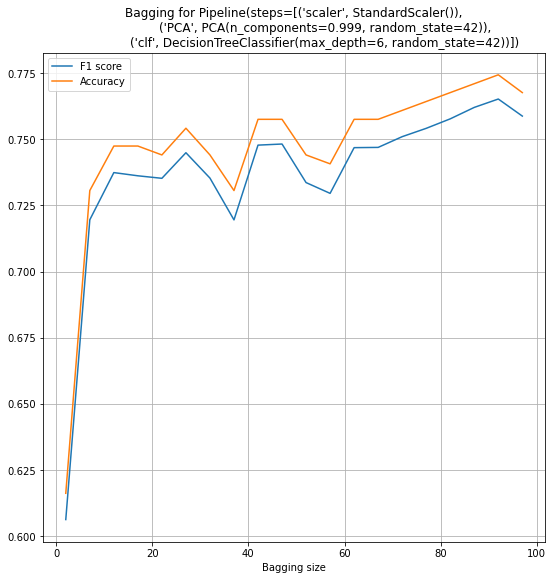

Got best f1 score 0.77 on size 92
Got best accuracy 0.77 on size 92


In [89]:
bagging_4_estimator(tree_gs.best_estimator_)

Both algorithms showed their best performance with quite a size of the ensembles. LR on size 97 and DT on size 92. Yet we can observe that approximately the same performance was achieved on the size around 30 so the size can be decreased to get relatively good outcome.

Best hyperparameters for a single tree are unlikely to fit best for an ensemble, due to the fact that single tree in order to learn better gets deeper and easily can be overfitted. Ensemble consist of a number of trees and even if they deep to the boundry of being overfitted still decision of the ensemble might be better.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

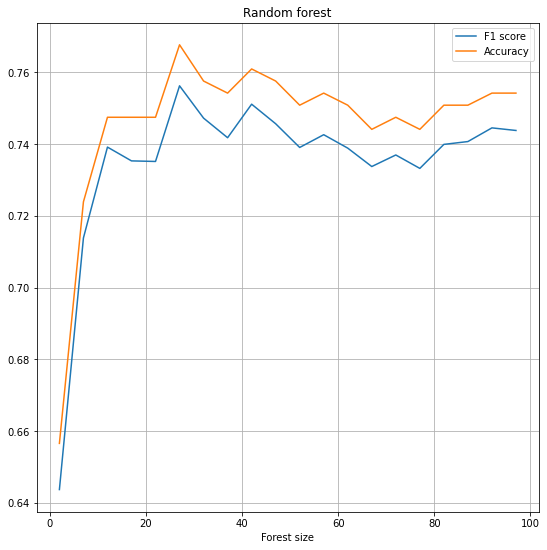

Got best f1 score 0.76 on size 27
Got best accuracy 0.77 on size 27


In [110]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
result = []
for i in range(2, 100, 5):
    ensemble = RandomForestClassifier(n_estimators=i,
                                max_depth=17,
                                random_state=17,
                                n_jobs=-1)
    ensemble.fit(X_train, y_train)
    preds = ensemble.predict(X_test)  
    
    f1 = f1_score(y_test, preds, average='macro')
    accuracy = accuracy_score(y_test, preds)
    result.append({'ensemble_size': i, 'f1_score': f1, 'accuracy': accuracy})
plt.figure(figsize=(9, 9))
sizes = [item['ensemble_size'] for item in result]
f1_scores = [item['f1_score'] for item in result]
accs = [item['accuracy'] for item in result]
plt.plot(sizes, f1_scores)
plt.plot(sizes, accs)
plt.grid()
plt.xlabel('Forest size')
plt.legend(['F1 score', 'Accuracy'])
plt.title(f'Random forest')
plt.show()
max_f1 = max(f1_scores)
max_acc = max(accs)
f_max_obj = f_max_objs[0] if (f_max_objs :=[x for x in result if x['f1_score']==max_f1]) else None
acc_max_obj = acc_max_objs[0] if (acc_max_objs :=[x for x in result if x['accuracy']==max_acc]) else None
print(f'Got best f1 score {max_f1:.2f} on size {f_max_obj["ensemble_size"]}')
print(f'Got best accuracy {max_acc:.2f} on size {acc_max_obj["ensemble_size"]}')

The best size for a random forest is different from the size in point 2.6 due to the crutial difference in algorithm since RF has each estimator trained on a subset of data and a subset of features unlike Decision Tree which is train on the whole data.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [122]:
# YOUR CODE HERE
parts = [int(i) for i in np.arange(1, 11) * int(X_train.shape[0]) / 10]
def learning_curve(model, X_train, y_train, X_test, y_test):
    result = []
    for i in parts:
        model.fit(X_train[:i], y_train[:i])
        preds = model.predict(X_test)
        f1 = f1_score(y_test, preds, average='macro')
        accuracy = accuracy_score(y_test, preds)
        result.append({'parts': i, 'f1_score': f1, 'accuracy': accuracy})
    plt.figure(figsize=(9, 9))
    sizes = [item['parts'] for item in result]
    f1_scores = [item['f1_score'] for item in result]
    accs = [item['accuracy'] for item in result]
    plt.plot(sizes, f1_scores)
    plt.plot(sizes, accs)
    plt.grid()
    plt.xlabel('Parts size')
    plt.legend(['F1 score', 'Accuracy'])
    plt.title(f'learning_curve for {model}')
    plt.show()
    max_f1 = max(f1_scores)
    max_acc = max(accs)
    f_max_obj = f_max_objs[0] if (f_max_objs :=[x for x in result if x['f1_score']==max_f1]) else None
    acc_max_obj = acc_max_objs[0] if (acc_max_objs :=[x for x in result if x['accuracy']==max_acc]) else None
    print(f'Got best f1 score {max_f1:.2f} on size {f_max_obj["parts"]}')
    print(f'Got best accuracy {max_acc:.2f} on size {acc_max_obj["parts"]}')

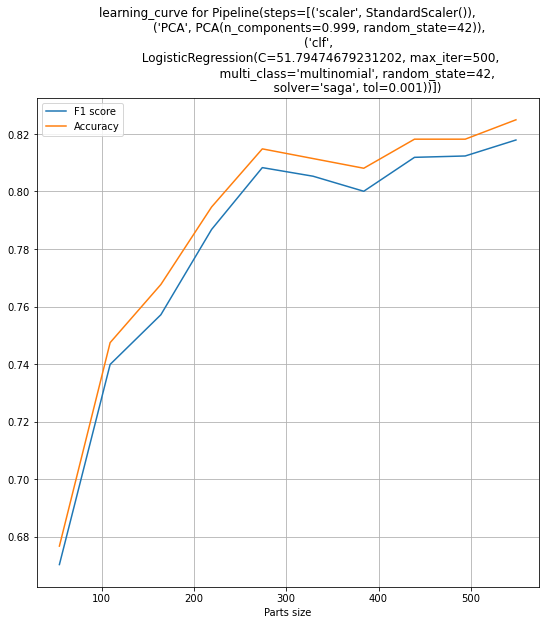

Got best f1 score 0.82 on size 549
Got best accuracy 0.82 on size 549


In [123]:
learning_curve(lr_gs.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test)

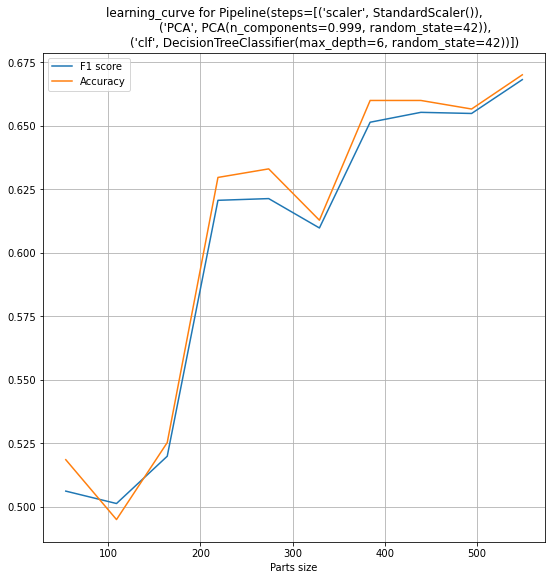

Got best f1 score 0.67 on size 549
Got best accuracy 0.67 on size 549


In [124]:
learning_curve(tree_gs.best_estimator_, X_train_scaled, y_train, X_test_scaled, y_test)

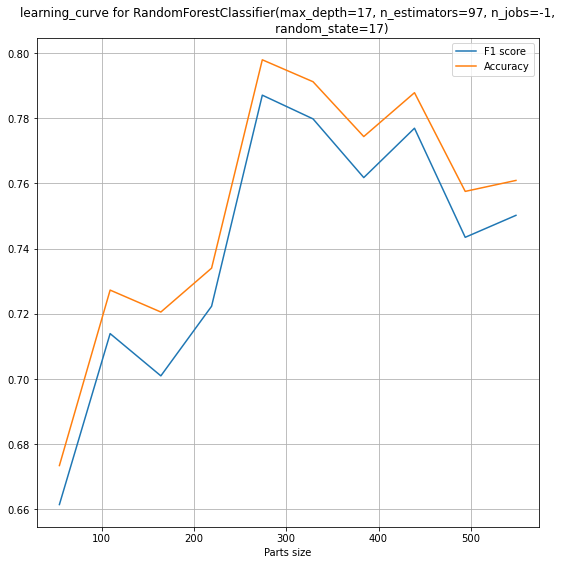

Got best f1 score 0.79 on size 274
Got best accuracy 0.80 on size 274


In [125]:
learning_curve(RandomForestClassifier(n_estimators=i,
                                max_depth=17,
                                random_state=17,
                                n_jobs=-1), X_train_scaled, y_train, X_test_scaled, y_test)

Decision tree is a graph that illustrates all possible outcomes of a decision using a branching approach. 
Decision tree is built on an entire dataset, using all the features. Decision tree quickly adapts to a dataset but can easily be overfitted.

Random forest builds many individual decision trees. It randomly selects features to build multiple decision trees from, each tree makes it's own decisions which are then averaged and that averaged data makes RF output. It is less likely to be affected by outliers. It uses only a few predictors to build each decision tree, the final decision trees tend to be decorrelated, meaning that the random forest model is unlikely to overfit.

Logistic Regression performed better than other models but we must remember that it's not always the case. In this task we can make a conclusion that this result is due to the data specifics. 
Yet Random Forest showed it's max performance on size 274 which is not far from LR best result and can be derived from less data. In some cases this can be main factor to choose RF over other algorightms.

Overall we learned how to preprocess data without loosing information. We scaled and reduced number of features. 
Then we learned the way to select best hyperparameters and measure performance for different algorithms. We figured out that for the data set we had for the tasks Logistic Regression showed better performance and sometimes there is no need to make large ensembles to get good enough outcome. Yet we learned how to create ensembles and applied them and main differences between Random Forest and Bagging of Decision Trees.